Columns in the dataset: Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     156     180   
1    Jae Crowder  Boston Celtics      99       SF   25     169     235   
2   John Holland  Boston Celtics      30       SG   27     178     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     164     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     160     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  
Team distribution and percentage: Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets       

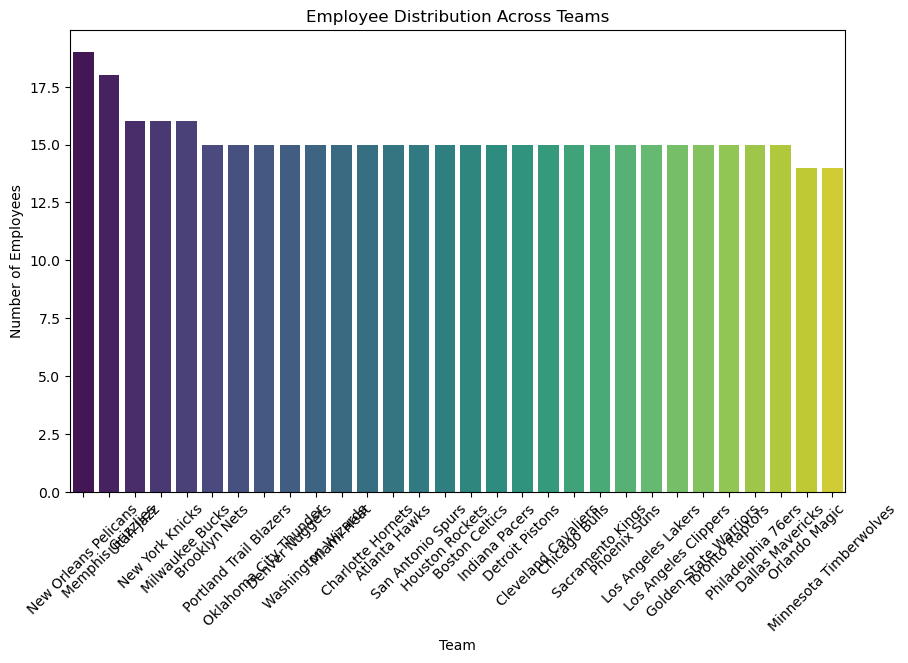

Position distribution: Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


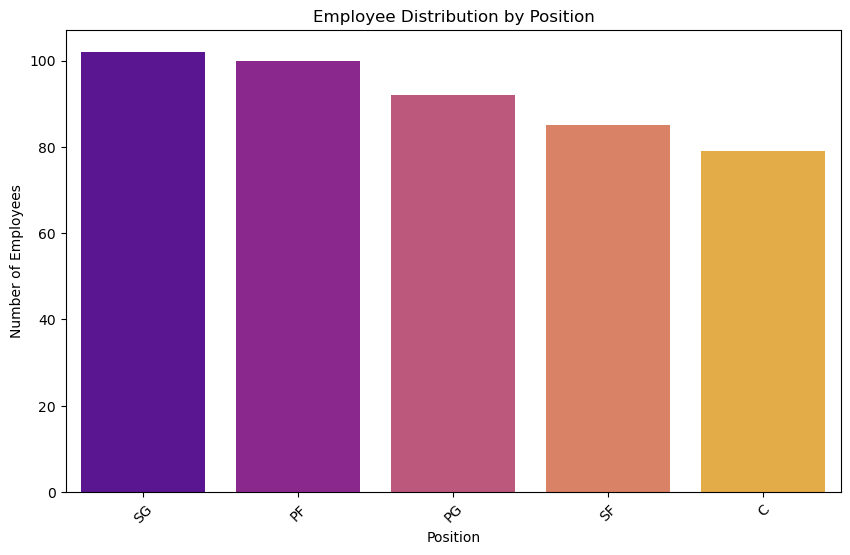

Predominant age group: 24


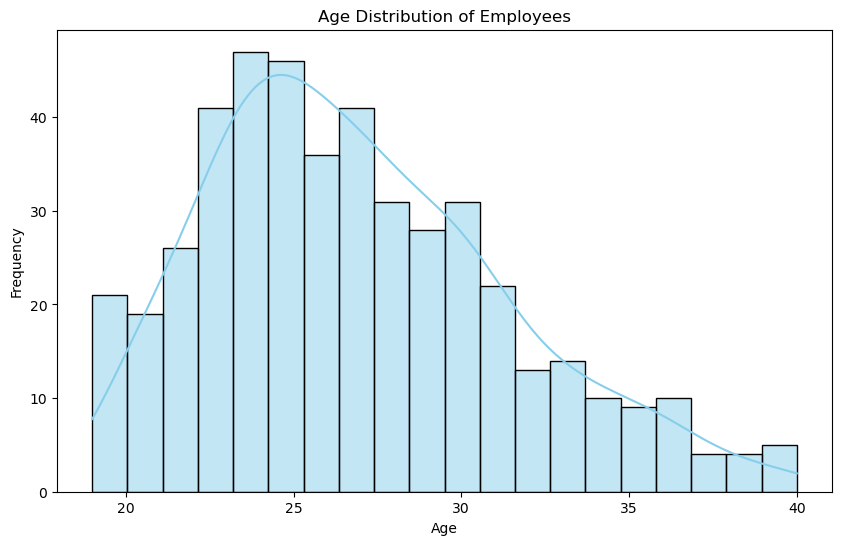

Highest salary expenditure team: Cleveland Cavaliers
Highest salary expenditure position: C


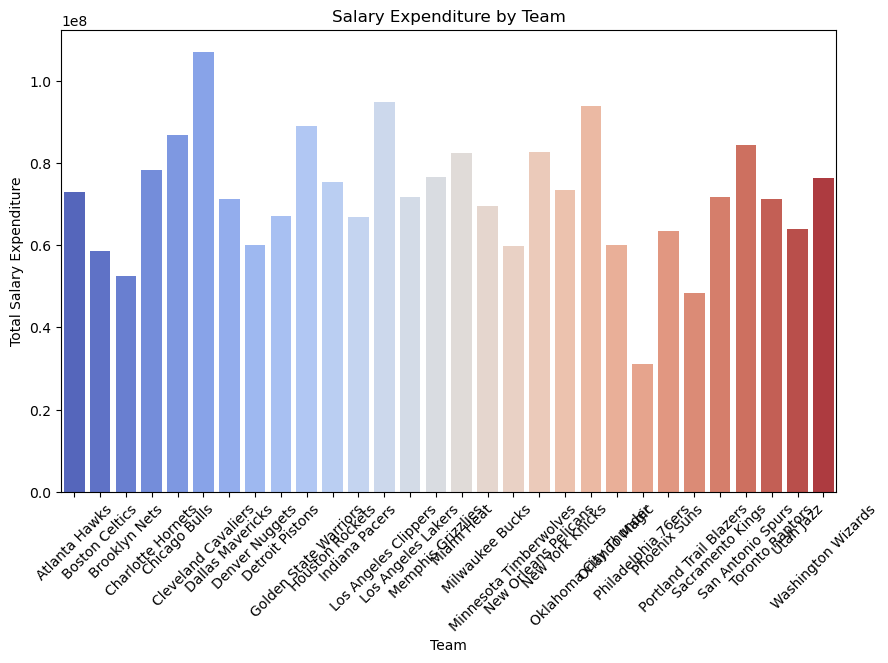

Correlation between Age and Salary:              Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


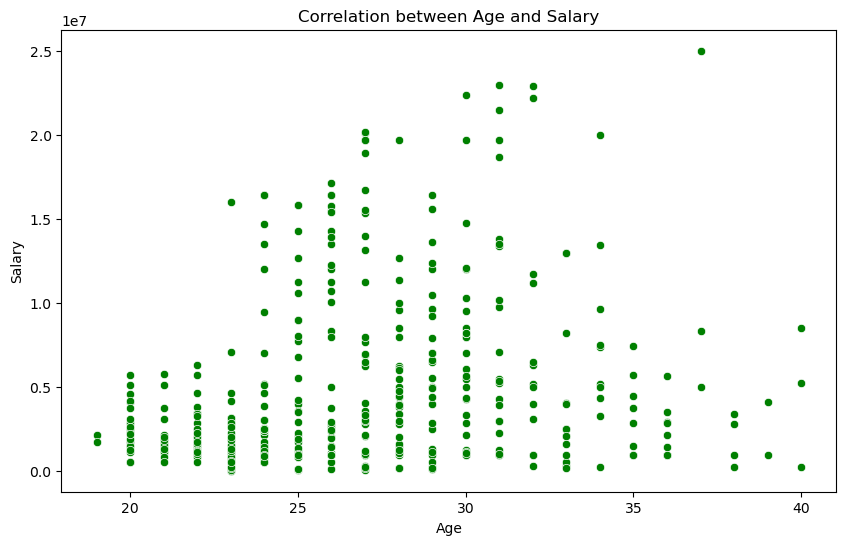

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from Google Sheets
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(url)

# Display the columns to check the column names
print("Columns in the dataset:", df.columns)

# Step 2: Preprocessing - Correct the "Height" column by replacing it with random values between 150 and 180.
np.random.seed(42)  # For reproducibility
df['Height'] = np.random.randint(150, 181, size=len(df))

# Check if the "Height" column is updated correctly
print(df.head())

# Step 3: Analysis Tasks

# Task 1: Distribution of employees across each team and percentage split
# Fix the column name to match the dataset's exact capitalization
if 'Team' in df.columns:
    team_distribution = df['Team'].value_counts()
    team_percentage = (team_distribution / len(df)) * 100
    print("Team distribution and percentage:", team_distribution, team_percentage)
    
    # Visualization for team distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=team_distribution.index, y=team_distribution.values, palette='viridis')
    plt.title('Employee Distribution Across Teams')
    plt.xlabel('Team')
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Team' not found in the dataset. Please check the column names.")

# Task 2: Segregate employees based on their positions within the company
# Fix the column name to match the dataset's exact capitalization
if 'Position' in df.columns:
    position_distribution = df['Position'].value_counts()
    print("Position distribution:", position_distribution)
    
    # Visualization for position distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=position_distribution.index, y=position_distribution.values, palette='plasma')
    plt.title('Employee Distribution by Position')
    plt.xlabel('Position')
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Position' not found in the dataset. Please check the column names.")

# Task 3: Identify the predominant age group
# Fix the column name to match the dataset's exact capitalization
if 'Age' in df.columns:
    predominant_age_group = df['Age'].mode()[0]
    print("Predominant age group:", predominant_age_group)
    
    # Visualization of age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
    plt.title('Age Distribution of Employees')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Age' not found in the dataset. Please check the column names.")

# Task 4: Discover which team and position have the highest salary expenditure
# Fix the column name to match the dataset's exact capitalization
if 'Salary' in df.columns:
    salary_by_team = df.groupby('Team')['Salary'].sum()
    salary_by_position = df.groupby('Position')['Salary'].sum()
    
    # Display the team and position with the highest salary expenditure
    highest_salary_team = salary_by_team.idxmax()
    highest_salary_position = salary_by_position.idxmax()
    print("Highest salary expenditure team:", highest_salary_team)
    print("Highest salary expenditure position:", highest_salary_position)
    
    # Visualization of salary expenditure by team
    plt.figure(figsize=(10, 6))
    sns.barplot(x=salary_by_team.index, y=salary_by_team.values, palette='coolwarm')
    plt.title('Salary Expenditure by Team')
    plt.xlabel('Team')
    plt.ylabel('Total Salary Expenditure')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Salary' not found in the dataset. Please check the column names.")

# Task 5: Investigate if there's any correlation between age and salary, and represent it visually
# Fix the column name to match the dataset's exact capitalization
if 'Age' in df.columns and 'Salary' in df.columns:
    correlation = df[['Age', 'Salary']].corr()
    print("Correlation between Age and Salary:", correlation)
    
    # Scatter plot to visualize the correlation between age and salary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Salary', data=df, color='green')
    plt.title('Correlation between Age and Salary')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()
else:
    print("Columns 'Age' or 'Salary' not found in the dataset. Please check the column names.")
